# Mom's Apriltags

---

This is a library primarily designed to build camera calibration boards. However, you can access the individual apriltags if you want.

In [1]:
# reload library
%load_ext autoreload
%autoreload 2

## Get Individual Tag

In [2]:
from moms_apriltag import generate
import numpy as np
from matplotlib import pyplot as plt

In [3]:
imgs = []
for family in ["tag16h5", "tag25h9", "tag36h10", "tag36h11"]:
    im = generate(family, [4])[0]
    # im = np.array(im.array)
    imgs.append(im)
              
print(imgs[0])

Tag(family='tag16h5', id=4, array=array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=uint8))


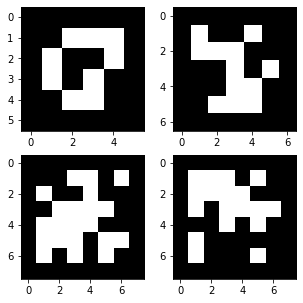

In [4]:
plt.figure(figsize=(5,5))
for i, im in enumerate(imgs):
    plt.subplot(2,2,i+1)
    plt.imshow(np.array(im.array), cmap="gray");

## Make Board

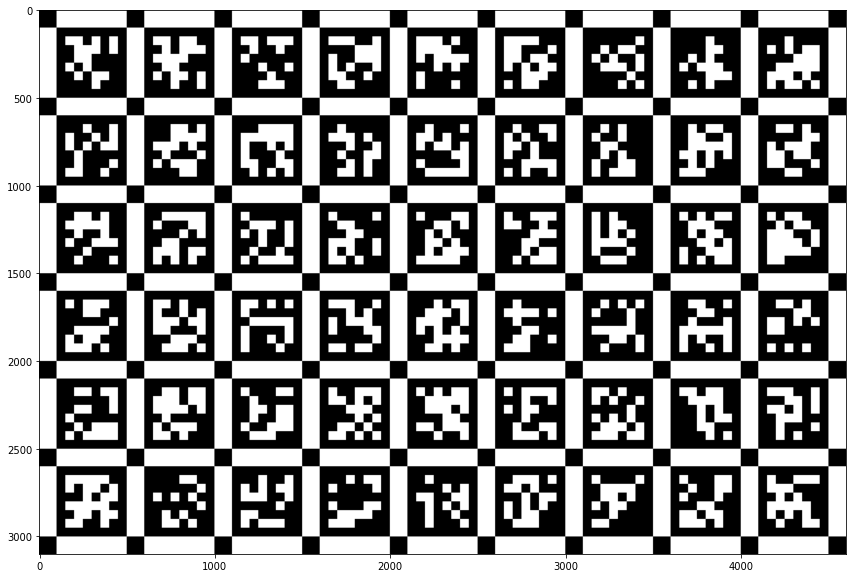

In [5]:
import moms_apriltag as apt

family = "tag36h11"
shape = (6,9)
size = 50

tgt = apt.board(shape, family, size)

plt.figure(figsize=(15,10))
plt.imshow(tgt, cmap="gray");

## Scaling Images

When scaling images, you want to keep nice sharp edges between black and white so software can read the tag properly. Here, I just a simple `numpy` function to scale the array up.

Original size: (8, 8)
Scaled size: (24, 24)


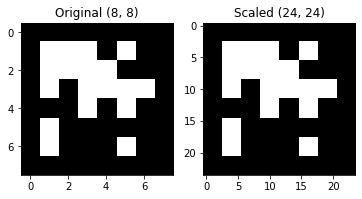

In [8]:
im = generate(family, [4])[0]
im = np.array(im.array)
print(f"Original size: {im.shape}")

scale = 3
ims = np.repeat(np.repeat(im, scale, axis=0), scale, axis=1)
print(f"Scaled size: {ims.shape}")

plt.subplot(121)
plt.imshow(im, cmap="gray")
plt.title(f"Original {im.shape}")
plt.subplot(122)
plt.imshow(ims, cmap="gray")
plt.title(f"Scaled {ims.shape}");